# 🔗 Datasets links

[MovieLens](https://grouplens.org/datasets/movielens/32m/)

[IMDb Non-Commercial Datasets](https://developer.imdb.com/non-commercial-datasets/)

[TMDB](https://developer.themoviedb.org/docs/daily-id-exports)

# 📚 Imports global

In [3]:
import pandas as pd
import zipfile
import gzip
import numpy as np

# 🗜️ Special import for Google Collab with connection to Google Disc

Please comment on these cells if you plan to work in Google Collab (you will need to authenticate):

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 🎬 MovieLens Dataset Details

## Общая информация
- **Название датасета:** MovieLens 32M  
- **Описание:** Эталонный датасет, содержащий оценки фильмов и пользовательские теги.  
- **Размер:**  
  - 32 000 000 оценок  
  - 2 000 000 пользовательских тегов  
  - 87 585 фильмов  
  - 200 948 пользователей  
- **Дата сбора данных:** октябрь 2023  
- **Дата публикации:** май 2024  

### Особенности:
- Датасет предназначен для тестирования и разработки рекомендательных систем.  
- Пользователи выбраны случайным образом.  
- Каждый пользователь оценил не менее определенного количества фильмов (минимальный порог не указан).  
- Демографическая информация отсутствует.  
- Фильмы включены только при наличии хотя бы одной оценки или тега.  

---

## Файлы в датасете
1. **`ratings.csv`** – данные об оценках  
2. **`tags.csv`** – пользовательские теги  
3. **`movies.csv`** – информация о фильмах  
4. **`links.csv`** – связи с внешними источниками  

---

## Описание полей

### 1. `ratings.csv` (оценки пользователей)
| Поле        | Описание |
|-------------|----------|
| `userId`    | Уникальный идентификатор пользователя |
| `movieId`   | Уникальный идентификатор фильма |
| `rating`    | Оценка фильма пользователем (от 0.5 до 5.0 с шагом 0.5) |
| `timestamp` | Временная метка в секундах с 1 января 1970 года (UTC) |

> **Примечание:** Файл отсортирован по `userId`, затем по `movieId`.

---

### 2. `tags.csv` (пользовательские теги)
| Поле        | Описание |
|-------------|----------|
| `userId`    | Уникальный идентификатор пользователя |
| `movieId`   | Уникальный идентификатор фильма |
| `tag`       | Текст тега (одно слово или короткая фраза) |
| `timestamp` | Временная метка в секундах с 1 января 1970 года (UTC) |

> **Примечание:** Файл отсортирован по `userId`, затем по `movieId`.

---

### 3. `movies.csv` (информация о фильмах)
| Поле      | Описание |
|-----------|----------|
| `movieId` | Уникальный идентификатор фильма |
| `title`   | Название фильма (включая год выпуска) |
| `genres`  | Список жанров фильма, разделенных `|` (например, `Comedy|Drama`) |

---

### 4. `links.csv` (связи с внешними источниками)
| Поле      | Описание |
|-----------|----------|
| `movieId` | Уникальный идентификатор фильма |
| `imdbId`  | Идентификатор фильма на IMDb |
| `tmdbId`  | Идентификатор фильма на TMDb (The Movie Database) |

---

## Дополнительная информация
- **Файлы `ratings.csv` и `tags.csv`** используют одинаковые `userId`, означая, что один пользователь имеет один и тот же идентификатор в обоих файлах.  
- **Файлы `ratings.csv`, `tags.csv`, `movies.csv` и `links.csv`** используют одинаковые `movieId`, связывая данные о фильмах между файлами.  
- **Фильмы с `movieId=1`** соответствуют ссылке [MovieLens ID 1](https://movielens.org/movies/1).


# 🎬 IMDb Dataset Details

## Описание датасета

Каждый набор данных содержится в сжатом (`.gz`) файле в формате TSV (табличные значения, разделенные табуляцией) с кодировкой UTF-8. Первая строка в каждом файле содержит заголовки, описывающие содержимое каждой колонки. Символ `\N` используется для обозначения отсутствующих или нулевых значений.

## Доступные наборы данных

### 1. `title.akas.tsv.gz`
Содержит альтернативные названия фильмов и сериалов.

| Поле                | Описание |
|----------------------|----------|
| **titleId (string)** | Уникальный буквенно-цифровой идентификатор названия (`tconst`) |
| **ordering (integer)** | Число, уникально идентифицирующее строки для заданного `titleId` |
| **title (string)** | Локализованное название |
| **region (string)** | Регион данной версии названия |
| **language (string)** | Язык данного названия |
| **types (array)** | Перечисленный набор атрибутов для альтернативного названия (например, `"alternative"`, `"dvd"`, `"festival"`, `"tv"`, `"video"`, `"working"`, `"original"`, `"imdbDisplay"`). Возможны новые значения в будущем |
| **attributes (array)** | Дополнительные характеристики, описывающие альтернативное название (не перечислены) |
| **isOriginalTitle (boolean)** | `0` — не оригинальное название; `1` — оригинальное название |

---

### 2. `title.basics.tsv.gz`
Содержит основные сведения о фильмах, сериалах и других видах медиаконтента.

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный буквенно-цифровой идентификатор названия |
| **titleType (string)** | Тип или формат названия (например, `movie`, `short`, `tvseries`, `tvepisode`, `video` и т. д.) |
| **primaryTitle (string)** | Основное (наиболее известное) название фильма или сериала |
| **originalTitle (string)** | Оригинальное название (на языке оригинала) |
| **isAdult (boolean)** | `0` — не является взрослым контентом; `1` — взрослый контент |
| **startYear (YYYY)** | Год выпуска фильма или начала трансляции сериала |
| **endYear (YYYY)** | Год окончания сериала (`\N` для других типов названий) |
| **runtimeMinutes (integer)** | Основная продолжительность фильма (в минутах) |
| **genres (array of strings)** | До трех жанров, относящихся к названию |

---

### 3. `title.crew.tsv.gz`
Содержит информацию о режиссерах и сценаристах.

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный буквенно-цифровой идентификатор названия |
| **directors (array of nconsts)** | Список идентификаторов режиссеров |
| **writers (array of nconsts)** | Список идентификаторов сценаристов |

---

### 4. `title.episode.tsv.gz`
Содержит информацию об эпизодах сериалов.

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный идентификатор эпизода |
| **parentTconst (string)** | Идентификатор родительского сериала |
| **seasonNumber (integer)** | Номер сезона, к которому относится эпизод |
| **episodeNumber (integer)** | Номер эпизода в указанном сезоне |

---

### 5. `title.principals.tsv.gz`
Содержит информацию об основных участниках фильмов и сериалов (актеры, режиссеры, сценаристы и т. д.).

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный буквенно-цифровой идентификатор названия |
| **ordering (integer)** | Число, уникально идентифицирующее строки для заданного `titleId` |
| **nconst (string)** | Уникальный буквенно-цифровой идентификатор участника (`nconst`) |
| **category (string)** | Категория профессии (например, `actor`, `director`, `producer`) |
| **job (string)** | Конкретная должность (если применимо), иначе `\N` |
| **characters (string)** | Имя персонажа (если применимо), иначе `\N` |

---

### 6. `title.ratings.tsv.gz`
Содержит информацию о пользовательских оценках фильмов и сериалов.

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный буквенно-цифровой идентификатор названия |
| **averageRating (float)** | Средний рейтинг на основе всех пользовательских оценок |
| **numVotes (integer)** | Количество голосов, полученных данным названием |

---

### 7. `name.basics.tsv.gz`
Содержит информацию о людях, связанных с киноиндустрией (актеры, режиссеры, сценаристы и т. д.).

| Поле                | Описание |
|----------------------|----------|
| **nconst (string)** | Уникальный буквенно-цифровой идентификатор человека |
| **primaryName (string)** | Основное имя, под которым человек чаще всего указывается в титрах |
| **birthYear (YYYY)** | Год рождения |
| **deathYear (YYYY)** | Год смерти (если применимо), иначе `\N` |
| **primaryProfession (array of strings)** | До трех основных профессий человека |
| **knownForTitles (array of tconsts)** | Список идентификаторов фильмов и сериалов, с которыми человек наиболее известен |


# 🎬 TMDb

## Описание набора данных TMDB ID Exports (актуально на 01.01.2025)

## Общая информация
TMDB публикует ежедневные экспортные файлы идентификаторов (ID). Эти файлы **не являются полными выгрузками данных**, а представляют собой список **валидных идентификаторов** из базы TMDB с некоторыми **дополнительными атрибутами**. В частности, они содержат информацию, полезную для фильтрации, например:
- Флаг **adult** (для контента 18+),
- Флаг **video** (для видеоконтента),
- Значение **popularity** (популярность элемента в базе TMDB).

### Формат данных
- **Каждая строка в файле представляет собой отдельный JSON-объект.**
- **Файл не является единым JSON-объектом**, а содержит множество JSON-строк.
- Такой формат позволяет эффективно **обрабатывать данные построчно**, не загружая весь файл в память.

### Доступность данных
- Все экспортные файлы можно загрузить с **[http://files.tmdb.org](http://files.tmdb.org)**.
- Выгрузка данных выполняется ежедневно:
  - **Начало экспорта:** 07:00 UTC.
  - **Файлы доступны:** к 08:00 UTC.
- Данные хранятся **только 3 месяца**, после чего автоматически удаляются.
- **Аутентификация не требуется**, но в будущем это может измениться. Если возникли проблемы с доступом, следует проверить актуальную документацию.

---

## Описание датасетов TMDB

TMDB предоставляет экспортные файлы с идентификаторами различных сущностей, включая фильмы, сериалы, людей, коллекции, телеканалы, ключевые слова и кинокомпании.

---

### 1. Датасет `movie` (Фильмы)
Содержит список фильмов с основными атрибутами.

| Поле              | Описание |
|-------------------|----------|
| **adult** (boolean) | Флаг, обозначающий, содержит ли фильм контент для взрослых (`true` – да, `false` – нет) |
| **id** (integer) | Уникальный идентификатор фильма в TMDB |
| **original_title** (string) | Оригинальное название фильма (на языке оригинала) |
| **popularity** (float) | Индекс популярности фильма (зависит от просмотров, оценок, поисковых запросов) |
| **video** (boolean) | Флаг, указывающий, является ли запись видеоконтентом (`true` – да, `false` – нет) |

---

### 2. Датасет `tv_series` (Сериалы)
Содержит список телесериалов с основными атрибутами.

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор сериала в TMDB |
| **original_name** (string) | Оригинальное название сериала |
| **popularity** (float) | Индекс популярности сериала |

---

### 3. Датасет `person` (Люди)
Содержит информацию о людях (актеры, режиссеры, сценаристы и т. д.).

| Поле              | Описание |
|-------------------|----------|
| **adult** (boolean) | Флаг, обозначающий, работал ли человек в индустрии взрослого контента (`true` – да, `false` – нет) |
| **id** (integer) | Уникальный идентификатор человека в TMDB |
| **name** (string) | Имя человека (как указано в базе TMDB) |
| **popularity** (float) | Индекс популярности персоны (основан на поисковых запросах и вовлеченности) |

---

### 4. Датасет `collection` (Коллекции)
Содержит информацию о коллекциях фильмов (например, серии фильмов "Гарри Поттер", "Мстители").

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор коллекции в TMDB |
| **name** (string) | Название коллекции |

---

### 5. Датасет `tv_network` (Телеканалы)
Содержит информацию о телеканалах, которые транслируют сериалы.

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор телеканала в TMDB |
| **name** (string) | Название телеканала |

---

### 6. Датасет `keyword` (Ключевые слова)
Содержит список **ключевых слов**, которые описывают тематику, концепции или сюжетные элементы фильмов и сериалов.

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор ключевого слова в TMDB |
| **name** (string) | Ключевое слово или фраза, характеризующая фильм/сериал (например, "prison", "hotel", "drug dealer", "rebellion") |

---

### 7. Датасет `production_company` (Кинокомпании)
Содержит список кинокомпаний, участвующих в производстве фильмов и сериалов.

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор кинокомпании в TMDB |
| **name** (string) | Название кинокомпании |

---

### Итог
Эти датасеты предоставляют базовые идентификаторы и атрибуты для фильмов, сериалов, актеров, коллекций, телеканалов, ключевых слов и кинокомпаний, что делает их полезными для фильтрации и работы с базой данных TMDB.

# 🧲 Диаграмма связей между таблицами (проверочная)

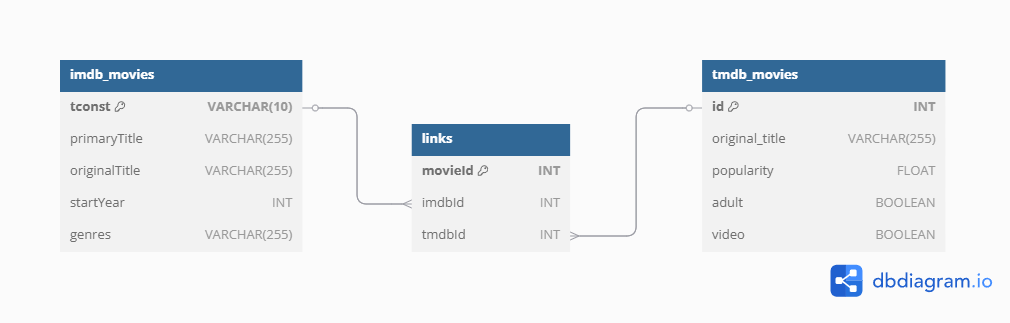

# 🎞️ MovieLens - data preparation

Загружаем архив с файлами в виде списка файлов. В случае работы в Google Collab нужно раскомментировать нужную строчку, а строчку над ней, наоборот, закомментировать

In [ ]:
zip_path_local = r'G:\data\movielens.zip'
# zip_path_google = '/content/drive/MyDrive/MovieLens/movielens.zip'

with zipfile.ZipFile(zip_path_local, 'r') as z:
    file_list = z.namelist()
    print(file_list)

['ratings.csv', 'links.csv', 'movies.csv', 'tags.csv']


Присваиваем имена переменных, где каждой переменной соотвтествует одно собственное имя файла

In [26]:
ml_ratings = file_list[0]
ml_links = file_list[1]
ml_movies = file_list[2]
ml_tags = file_list[3]

По очереди открываем для предварительно просмотра

Рейтинги

In [28]:
with zipfile.ZipFile(zip_path_local, 'r') as z:
    with z.open(ml_ratings) as f:
        df_ratings = pd.read_csv(f)

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


Связующая таблица, которая содержит идентификаторы фильмов в различных источниках

In [30]:
with zipfile.ZipFile(zip_path_local, 'r') as z:
    with z.open(ml_links) as f:
        df_links = pd.read_csv(f)

df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Кинофильмы

In [31]:
with zipfile.ZipFile(zip_path_local, 'r') as z:
    with z.open(ml_movies) as f:
        df_movies = pd.read_csv(f)

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Пользовательские теги

In [32]:
with zipfile.ZipFile(zip_path_local, 'r') as z:
    with z.open(ml_tags) as f:
        df_tags = pd.read_csv(f)

df_tags.head()

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102


# 🎞️ IMDb - data preparation

In [34]:
imdb_name = r'G:\data\name.basics.tsv.gz'
imdb_basic = r'G:\data\title.basics.tsv.gz'
imdb_akas = r'G:\data\title.akas.tsv.gz'
imdb_princip = r'G:\data\title.principals.tsv.gz'
imdb_ratings = r'G:\data\title.ratings.tsv.gz'
imdb_crew = r'G:\data\title.crew.tsv.gz'
imdb_episode = r'G:\data\title.episode.tsv.gz'

################# GOOGLE COLLAB #################
# imdb_name = '/content/drive/MyDrive/MovieLens/name.basics.tsv.gz'
# imdb_basic = '/content/drive/MyDrive/MovieLens/title.basics.tsv.gz'
# imdb_akas = '/content/drive/MyDrive/MovieLens/title.akas.tsv.gz'
# imdb_princip = '/content/drive/MyDrive/MovieLens/title.principals.tsv.gz'
# imdb_ratings = '/content/drive/MyDrive/MovieLens/title.ratings.tsv.gz'
# imdb_crew = '/content/drive/MyDrive/MovieLens/title.crew.tsv.gz'
# imdb_episode = '/content/drive/MyDrive/MovieLens/title.episode.tsv.gz'

In [36]:
with gzip.open(imdb_name, "rt", encoding="utf-8") as f:
    df_imdb_name = pd.read_csv(f, sep="\t") 

df_imdb_name.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


In [38]:
with gzip.open(imdb_basic, "rt", encoding="utf-8") as f:
    df_imdb_basic = pd.read_csv(f, sep="\t", low_memory=False) 

df_imdb_basic.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [39]:
with gzip.open(imdb_akas, "rt", encoding="utf-8") as f:
    df_imdb_akas = pd.read_csv(f, sep="\t") 

df_imdb_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0


In [40]:
with gzip.open(imdb_princip, "rt", encoding="utf-8") as f:
    df_imdb_princip = pd.read_csv(f, sep="\t") 

df_imdb_princip.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N


In [41]:
with gzip.open(imdb_ratings, "rt", encoding="utf-8") as f:
    df_imdb_ratings = pd.read_csv(f, sep="\t") 

df_imdb_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2130
1,tt0000002,5.6,289
2,tt0000003,6.4,2166
3,tt0000004,5.3,184
4,tt0000005,6.2,2892


In [42]:
with gzip.open(imdb_crew, "rt", encoding="utf-8") as f:
    df_imdb_crew = pd.read_csv(f, sep="\t") 

df_imdb_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [43]:
with gzip.open(imdb_episode, "rt", encoding="utf-8") as f:
    df_imdb_episode = pd.read_csv(f, sep="\t") 

df_imdb_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0031458,tt32857063,\N,\N
1,tt0041951,tt0041038,1,9
2,tt0042816,tt0989125,1,17
3,tt0042889,tt0989125,\N,\N
4,tt0043426,tt0040051,3,42


# 🎞️ TMDB - data preparation

In [44]:
tmdb_movie = r'G:\data\movie_ids_01_01_2025.json.gz'
tmdb_series = r'G:\data\tv_series_ids_01_01_2025.json.gz'
tmdb_person = r'G:\data\person_ids_01_01_2025.json.gz'
tmdb_collect = r'G:\data\collection_ids_01_01_2025.json.gz'
tmdb_network = r'G:\data\tv_network_ids_01_01_2025.json.gz'
tmdb_keyword = r'G:\data\keyword_ids_01_01_2025.json.gz'
tmdb_company = r'G:\data\production_company_ids_01_01_2025.json.gz'

################# GOOGLE COLLAB #################
# tmdb_movie = '/content/drive/MyDrive/MovieLens/movie_ids_01_01_2025.json.gz'
# tmdb_series = '/content/drive/MyDrive/MovieLens/tv_series_ids_01_01_2025.json.gz'
# tmdb_person = '/content/drive/MyDrive/MovieLens/person_ids_01_01_2025.json.gz'
# tmdb_collect = '/content/drive/MyDrive/MovieLens/collection_ids_01_01_2025.json.gz'
# tmdb_network = '/content/drive/MyDrive/MovieLens/tv_network_ids_01_01_2025.json.gz'
# tmdb_keyword = '/content/drive/MyDrive/MovieLens/keyword_ids_01_01_2025.json.gz'
# tmdb_company = '/content/drive/MyDrive/MovieLens/production_company_ids_01_01_2025.json.gz'

In [47]:
with gzip.open(tmdb_movie, "rt", encoding="utf-8") as f:
    df_tmdb_movie = pd.read_json(f, lines=True)

df_tmdb_movie.head()

,adult,id,original_title,popularity,video
0,False,3924,Blondie,3.474,False
1,False,6124,Der Mann ohne Namen,0.420,False
2,False,8773,L'Amour à vingt ans,3.917,False
3,False,25449,New World Disorder 9: Never Enough,0.735,False
4,False,31975,Sesame Street: Elmo Loves You!,0.003,True


In [48]:
with gzip.open(tmdb_series, "rt", encoding="utf-8") as f:
    df_tmdb_series = pd.read_json(f, lines=True)

df_tmdb_series.head()

,id,original_name,popularity
0,1,プライド,20.947
1,2,Clerks,20.062
2,3,The Message,6.906
3,4,The Amazing Mrs Pritchard,24.350
4,5,La Job,16.433


In [49]:
with gzip.open(tmdb_person, "rt", encoding="utf-8") as f:
    df_tmdb_person = pd.read_json(f, lines=True)

df_tmdb_person.head()

,adult,id,name,popularity
0,False,16767,Aki Kaurismäki,5.052
1,False,54768,Turo Pajala,1.256
2,False,54769,Susanna Haavisto,1.538
3,False,4826,Matti Pellonpää,5.526
4,False,54770,Eetu Hilkamo,0.001


In [50]:
with gzip.open(tmdb_collect, "rt", encoding="utf-8") as f:
    df_tmdb_collect = pd.read_json(f, lines=True)

df_tmdb_collect.head()

,id,name
0,10,Star Wars Collection
1,84,Indiana Jones Collection
2,119,The Lord of the Rings Collection
3,131,Trois Couleurs Collection
4,151,Star Trek: The Original Series Collection


In [51]:
with gzip.open(tmdb_network, "rt", encoding="utf-8") as f:
    df_tmdb_network = pd.read_json(f, lines=True)

df_tmdb_network.head()

,id,name
0,1,Fuji TV
1,2,ABC
2,3,BBC Three
3,4,BBC One
4,5,Bell TV


In [52]:
with gzip.open(tmdb_keyword, "rt", encoding="utf-8") as f:
    df_tmdb_keyword = pd.read_json(f, lines=True)

df_tmdb_keyword.head()

,id,name
0,378,prison
1,240,underdog
2,1787,"helsinki, finland"
3,730,factory worker
4,1361,salesclerk


In [53]:
with gzip.open(tmdb_company, "rt", encoding="utf-8") as f:
    df_tmdb_company = pd.read_json(f, lines=True)

df_tmdb_company.head()

,id,name
0,1,Lucasfilm Ltd.
1,2,Walt Disney Pictures
2,3,Pixar
3,4,Paramount Pictures
4,5,Columbia Pictures


# 🧲 Попытка объединить согласно Диаграмме связей

Берем таблицу `links` из датасета `MovieLens`, создаем столбец `ttimdbId` добавляя двойное `tt` к `imdbId` так как в датасете `IMDb` идентификаторы в поле `tconst` выглядят следующим образом `tt114709`

In [55]:
df_links['ttimdbId'] = 'tt' + df_links['imdbId'].astype(str)
df_links.head()

,movieId,imdbId,tmdbId,ttimdbId
0,1,114709,862.0,tt114709
1,2,113497,8844.0,tt113497
2,3,113228,15602.0,tt113228
3,4,114885,31357.0,tt114885
4,5,113041,11862.0,tt113041


Количество строк в датасете `MovieLens`

In [75]:
df_links.shape[0]

87585

Теперь объединим с датасетом `IMDb`

In [56]:
merged_df = pd.merge(df_links, df_imdb_basic, left_on='ttimdbId', right_on='tconst', how='left', indicator=True)
merged_df.head()

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,_merge
0,1,114709,862.0,tt114709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,113497,8844.0,tt113497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,113228,15602.0,tt113228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,4,114885,31357.0,tt114885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,5,113041,11862.0,tt113041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


Из результата выше видно невооруженным глазом, что не все строки объединились, вероятно не все фильмы из `MovieLens` представлены в `IMDb`

Возьмем только те строки, которые объединились `merged_df['_merge'] == 'both'`

In [62]:
merged_df_both = merged_df[merged_df['_merge'] == 'both']
merged_df_both.head()

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,_merge
11649,53519,1028528,1991.0,tt1028528,tt1028528,movie,Death Proof,Death Proof,0,2007,\N,127,"Drama,Thriller",both
11812,54995,1077258,1992.0,tt1077258,tt1077258,movie,Planet Terror,Planet Terror,0,2007,\N,105,"Action,Comedy,Horror",both
11820,55063,1093842,13241.0,tt1093842,tt1093842,movie,My Winnipeg,My Winnipeg,0,2007,\N,80,"Comedy,Documentary,Drama",both
11822,55069,1032846,2009.0,tt1032846,tt1032846,movie,"4 Months, 3 Weeks and 2 Days","4 luni, 3 saptamâni si 2 zile",0,2007,\N,113,Drama,both
11973,56167,1024943,8079.0,tt1024943,tt1024943,movie,Om Shanti Om,Om Shanti Om,0,2007,\N,162,"Action,Comedy,Drama",both


Строк стало сильно меньше

In [77]:
merged_df_both.shape[0]

40848

Меньше на `46737` фильмов

In [78]:
merged_df.shape[0] - merged_df_both.shape[0]

46737

Смотрим пропущенные, и видим, что 61 фильм в `MovieLens` не имеет индентификатора `tmbdId`

In [63]:
merged_df_both.isnull().sum()

movieId            0
imdbId             0
tmdbId            61
ttimdbId           0
tconst             0
titleType          0
primaryTitle       0
originalTitle      0
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres             0
_merge             0
dtype: int64

Вот эти киноленты, которые не имеюют идентификатора `tmdbId`

In [66]:
merged_df_both[merged_df_both['tmdbId'].isnull()]

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,_merge
13306,68533,1359583,NaN,tt1359583,tt1359583,movie,Within Limits,Liikkumavara,0,2009,\N,90,Documentary,both
13667,70800,1141486,NaN,tt1141486,tt1141486,tvMiniSeries,Paris,Paris,0,2007,\N,60,Documentary,both
13975,72332,1517595,NaN,tt1517595,tt1517595,short,An Introduction to Physics,An Introduction to Physics,0,2009,\N,9,"Adventure,Comedy,Fantasy",both
14057,72781,1104746,NaN,tt1104746,tt1104746,tvSeries,Red Chapel,Det røde kapel,0,2006,2006,59,"Comedy,Documentary",both
14376,74679,1433856,NaN,tt1433856,tt1433856,movie,In the Shadow of Doubt,Epäilyksen varjossa - Elokuva Alpo Rusista,0,2010,\N,75,"Documentary,Drama,News",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69664,224398,5868094,NaN,tt5868094,tt5868094,tvMovie,She Loves Me,She Loves Me,0,2016,\N,133,"Comedy,Musical,Romance",both
72372,234301,5714216,NaN,tt5714216,tt5714216,movie,Black Butler: Book of Murder,Black Butler: Book of Murder,0,2014,\N,116,"Adventure,Animation,Crime",both
73033,237231,9372822,NaN,tt9372822,tt9372822,short,Tenderness,Nezhnost,0,2018,\N,21,"Romance,Short",both
84374,281988,8031054,NaN,tt8031054,tt8031054,movie,Botero,Botero,0,2018,\N,82,"Biography,Documentary",both


Отфильтруем датасет, таким образом, чтобы у нас не было фильмов без `tmdbId`

In [67]:
merged_df_both_tmdb = merged_df_both[~merged_df_both['tmdbId'].isnull()]
merged_df_both_tmdb.head()

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,_merge
11649,53519,1028528,1991.0,tt1028528,tt1028528,movie,Death Proof,Death Proof,0,2007,\N,127,"Drama,Thriller",both
11812,54995,1077258,1992.0,tt1077258,tt1077258,movie,Planet Terror,Planet Terror,0,2007,\N,105,"Action,Comedy,Horror",both
11820,55063,1093842,13241.0,tt1093842,tt1093842,movie,My Winnipeg,My Winnipeg,0,2007,\N,80,"Comedy,Documentary,Drama",both
11822,55069,1032846,2009.0,tt1032846,tt1032846,movie,"4 Months, 3 Weeks and 2 Days","4 luni, 3 saptamâni si 2 zile",0,2007,\N,113,Drama,both
11973,56167,1024943,8079.0,tt1024943,tt1024943,movie,Om Shanti Om,Om Shanti Om,0,2007,\N,162,"Action,Comedy,Drama",both


Во время преобразований в столбце `tmdbId` случайно изменился тип данных, вернем ему исходный тип `int`

In [70]:
merged_df_both_tmdb.loc[:, 'tmdbId'] = merged_df_both_tmdb['tmdbId'].astype(int)
merged_df_both_tmdb.head()

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,_merge
11649,53519,1028528,1991,tt1028528,tt1028528,movie,Death Proof,Death Proof,0,2007,\N,127,"Drama,Thriller",both
11812,54995,1077258,1992,tt1077258,tt1077258,movie,Planet Terror,Planet Terror,0,2007,\N,105,"Action,Comedy,Horror",both
11820,55063,1093842,13241,tt1093842,tt1093842,movie,My Winnipeg,My Winnipeg,0,2007,\N,80,"Comedy,Documentary,Drama",both
11822,55069,1032846,2009,tt1032846,tt1032846,movie,"4 Months, 3 Weeks and 2 Days","4 luni, 3 saptamâni si 2 zile",0,2007,\N,113,Drama,both
11973,56167,1024943,8079,tt1024943,tt1024943,movie,Om Shanti Om,Om Shanti Om,0,2007,\N,162,"Action,Comedy,Drama",both


Переименуем столбец, чтобы не было конфликтов при дальнейшем объединении

In [72]:
merged_df_both_tmdb.rename(columns={'_merge': 'merge_1'})

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,merge_1
11649,53519,1028528,1991,tt1028528,tt1028528,movie,Death Proof,Death Proof,0,2007,\N,127,"Drama,Thriller",both
11812,54995,1077258,1992,tt1077258,tt1077258,movie,Planet Terror,Planet Terror,0,2007,\N,105,"Action,Comedy,Horror",both
11820,55063,1093842,13241,tt1093842,tt1093842,movie,My Winnipeg,My Winnipeg,0,2007,\N,80,"Comedy,Documentary,Drama",both
11822,55069,1032846,2009,tt1032846,tt1032846,movie,"4 Months, 3 Weeks and 2 Days","4 luni, 3 saptamâni si 2 zile",0,2007,\N,113,Drama,both
11973,56167,1024943,8079,tt1024943,tt1024943,movie,Om Shanti Om,Om Shanti Om,0,2007,\N,162,"Action,Comedy,Drama",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87579,292709,5490470,404806,tt5490470,tt5490470,movie,End of the Season,Zwischen den Jahren,0,2017,\N,97,Drama,both
87580,292731,26812510,1032473,tt26812510,tt26812510,movie,El caso Monroy,El caso Monroy,0,2022,\N,95,Drama,both
87581,292737,14907358,986674,tt14907358,tt14907358,movie,Shelter in Solitude,Shelter in Solitude,0,2023,\N,93,"Comedy,Crime,Drama",both
87582,292753,12388280,948139,tt12388280,tt12388280,movie,Orca,Orca,0,2021,\N,107,Drama,both


В нашем датасете осталось `40787` кинолент

Объединим с `TMDB`

In [73]:
merged_df_all = pd.merge(merged_df_both_tmdb, df_tmdb_movie, left_on='tmdbId', right_on='id', how='left', indicator=True)
merged_df_all.head()

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,merge_1,adult,id,original_title,popularity,video,_merge
0,53519,1028528,1991,tt1028528,tt1028528,movie,Death Proof,Death Proof,0,2007,\N,127,"Drama,Thriller",both,False,1991.0,Death Proof,28.186,False,both
1,54995,1077258,1992,tt1077258,tt1077258,movie,Planet Terror,Planet Terror,0,2007,\N,105,"Action,Comedy,Horror",both,False,1992.0,Planet Terror,26.084,False,both
2,55063,1093842,13241,tt1093842,tt1093842,movie,My Winnipeg,My Winnipeg,0,2007,\N,80,"Comedy,Documentary,Drama",both,False,13241.0,My Winnipeg,5.262,False,both
3,55069,1032846,2009,tt1032846,tt1032846,movie,"4 Months, 3 Weeks and 2 Days","4 luni, 3 saptamâni si 2 zile",0,2007,\N,113,Drama,both,False,2009.0,"4 luni, 3 săptămîni și 2 zile",10.354,False,both
4,56167,1024943,8079,tt1024943,tt1024943,movie,Om Shanti Om,Om Shanti Om,0,2007,\N,162,"Action,Comedy,Drama",both,False,8079.0,ओम शांति ओम,17.561,False,both


Все три датасета успешно объединились через таблицу `links` из набора `MovieLens`, можно проводит дальнейшие объединения, преобразования, и тд и тп...

In [74]:
merged_df_all

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,merge_1,adult,id,original_title,popularity,video,_merge
0,53519,1028528,1991,tt1028528,tt1028528,movie,Death Proof,Death Proof,0,2007,\N,127,"Drama,Thriller",both,False,1991.0,Death Proof,28.186,False,both
1,54995,1077258,1992,tt1077258,tt1077258,movie,Planet Terror,Planet Terror,0,2007,\N,105,"Action,Comedy,Horror",both,False,1992.0,Planet Terror,26.084,False,both
2,55063,1093842,13241,tt1093842,tt1093842,movie,My Winnipeg,My Winnipeg,0,2007,\N,80,"Comedy,Documentary,Drama",both,False,13241.0,My Winnipeg,5.262,False,both
3,55069,1032846,2009,tt1032846,tt1032846,movie,"4 Months, 3 Weeks and 2 Days","4 luni, 3 saptamâni si 2 zile",0,2007,\N,113,Drama,both,False,2009.0,"4 luni, 3 săptămîni și 2 zile",10.354,False,both
4,56167,1024943,8079,tt1024943,tt1024943,movie,Om Shanti Om,Om Shanti Om,0,2007,\N,162,"Action,Comedy,Drama",both,False,8079.0,ओम शांति ओम,17.561,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40782,292709,5490470,404806,tt5490470,tt5490470,movie,End of the Season,Zwischen den Jahren,0,2017,\N,97,Drama,both,False,404806.0,Zwischen den Jahren,1.226,False,both
40783,292731,26812510,1032473,tt26812510,tt26812510,movie,El caso Monroy,El caso Monroy,0,2022,\N,95,Drama,both,False,1032473.0,El caso Monroy,1.045,False,both
40784,292737,14907358,986674,tt14907358,tt14907358,movie,Shelter in Solitude,Shelter in Solitude,0,2023,\N,93,"Comedy,Crime,Drama",both,False,986674.0,Shelter in Solitude,3.296,False,both
40785,292753,12388280,948139,tt12388280,tt12388280,movie,Orca,Orca,0,2021,\N,107,Drama,both,False,948139.0,Orca,2.079,False,both
